In [1]:
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
import geopy
import matplotlib.pyplot as plt
from timeit import default_timer as timer
from geopy.geocoders import GoogleV3



In [4]:
df1 = pd.read_csv('201901-capitalbikeshare-tripdata.csv')
df2 = pd.read_csv('201902-capitalbikeshare-tripdata.csv')
df3 = pd.read_csv('201903-capitalbikeshare-tripdata.csv')
df4 = pd.read_csv('201904-capitalbikeshare-tripdata.csv')
df5 = pd.read_csv('201905-capitalbikeshare-tripdata.csv')
df6 = pd.read_csv('201906-capitalbikeshare-tripdata.csv')
df7 = pd.read_csv('201907-capitalbikeshare-tripdata.csv')
df8 = pd.read_csv('201908-capitalbikeshare-tripdata.csv')
df9 = pd.read_csv('201909-capitalbikeshare-tripdata.csv')
df10 = pd.read_csv('201910-capitalbikeshare-tripdata.csv')
df11 = pd.read_csv('201911-capitalbikeshare-tripdata.csv')
df12 = pd.read_csv('201912-capitalbikeshare-tripdata.csv')
geolocator = Nominatim(user_agent="specify_your_app_name_here")
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12])

from geopy.exc import GeocoderTimedOut

def do_geocode(address):
    try:
        return geolocator.geocode(address)
    except GeocoderTimedOut:
        return do_geocode(address)

In [5]:
start = timer()

S = df['Start station']
E = df['End station']
val = S.append(E,ignore_index = True)

val = pd.DataFrame(val)

val.columns = ['address']

#val.columns('id','address')
# val.rename(index = {0:"id",1:"address"})
# val
S = val.pivot_table(index=['address'], aggfunc='size')

S = pd.DataFrame(S)
count = np.asarray(S).ravel()
location = np.zeros((count.shape[0],2))
ind = 0
nonexist = []
for address in S.index.tolist():
    geodata = do_geocode(address)
    if geodata != None:
        location[ind,:] = [geodata.longitude,geodata.latitude]
        ind+=1
    else:
        location[ind,:] = [0,0]
        ind+=1
        
d = {'longitude': location[:,0], 'latitude': location[:,1], 'occurance':count}
df = pd.DataFrame(d)

df = df.loc[(df != 0).all(1)]

 
from mpl_toolkits.axes_grid1 import make_axes_locatable
dc_map = plt.imread('./dc_map_2.png')
fig, ax = plt.subplots(figsize = (8,12))


weight = df.occurance
sc = ax.scatter(df.longitude, df.latitude, s = weight/max(weight)*500,zorder=1, 
                alpha= 0.8, c=df.occurance/1000, cmap="jet")


BBox = (-77.1002,-76.9390,      
         38.8549,38.9346)
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(dc_map, zorder=0, extent = BBox, aspect= 'equal')

divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
cbar = fig.colorbar(sc, cax=cax,boundaries=np.linspace(0, 200,41))
cbar.set_clim(0, 200)


fig.savefig('2019.png', dpi=300,bbox='t')
fig

    
end = timer()
print('Spent %d seconds to convert address to longitudes and latitudes' %(end-start))

GeocoderServiceError: [Errno 8] nodename nor servname provided, or not known

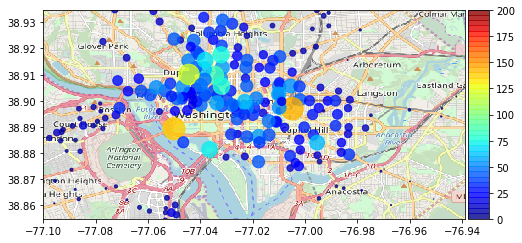

In [4]:
fig